## EDA

In [131]:
import json

with open('/Users/shaleenanandtaneja/Desktop/ultimate_challenge/logins.json') as json_file:
    data = json.load(json_file)

In [132]:
type(data['login_time'])

list

In [133]:
import pandas as pd
data_df = pd.DataFrame(data['login_time'])

In [134]:
data_df.columns = ['login_time']

In [135]:
data_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [136]:
data_df['login_time'] = pd.to_datetime(data_df['login_time'])
data_df.set_index('login_time', inplace=True)

In [137]:
data_df['logins'] = 1

In [138]:
minutes15 = data_df.resample('15min').sum()

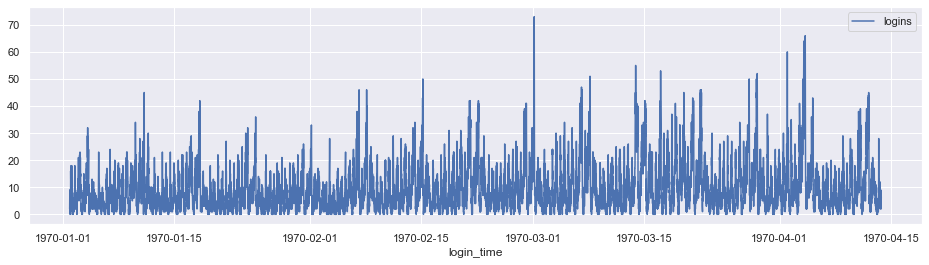

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(16,4))

sns.set(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(hue="region", style="event",
             data=minutes15) # plot seems to follow cyclic nature 

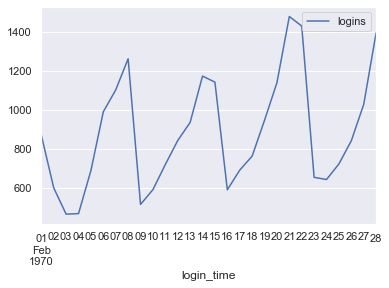

In [140]:
data_df.loc['1970-02'].resample('D').sum().plot() # checking daily average for month of feb

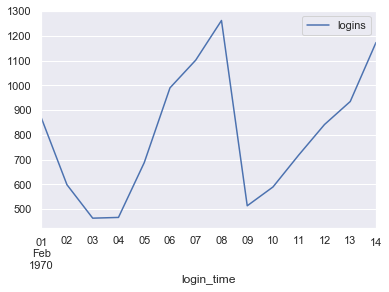

In [141]:
data_df.loc['1970-02-01':'1970-02-14'].resample('D').sum().plot()

In [142]:
pd.to_datetime('1970-02-03').weekday()

1

We can see increased number of logins during weekend

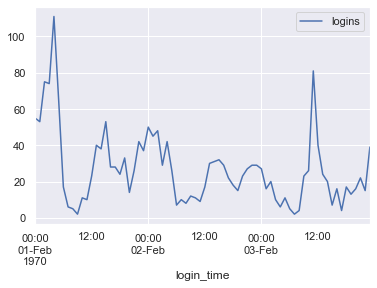

In [143]:
data_df.loc['1970-02-01':'1970-02-03'].resample('H').sum().plot()

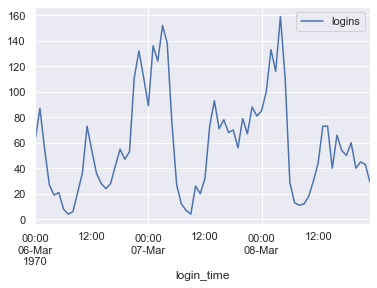

In [144]:
data_df.loc['1970-03-06':'1970-03-08'].resample('H').sum().plot()

Max logins appear around midnight

## Predictive modelling

In [145]:
with open('/Users/shaleenanandtaneja/Desktop/ultimate_challenge/ultimate_data_challenge.json') as json_file:
    ultimate_df = json.load(json_file)

In [146]:
ultimate_df = pd.DataFrame(ultimate_df)

In [147]:
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [148]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [149]:
ultimate_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


### EDA

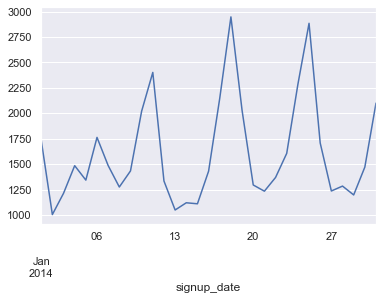

In [150]:
ultimate_df['signup_date'] = pd.to_datetime(ultimate_df['signup_date'])
ultimate_df.set_index('signup_date')['city'].resample('D').count().plot() # seeing the signup data

We have the data for the month of Jan, 14

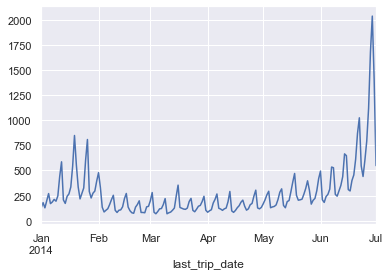

In [151]:
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])
ultimate_df.set_index('last_trip_date')['city'].resample('D').count().plot() # seeing the signup data

In [152]:
ultimate_df['last_trip_date'].describe()

count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

As the last trip date is July 1st so we check for the users retained till the month of June

In [153]:
(ultimate_df.last_trip_date >= '2014-06-01').sum() / (ultimate_df.last_trip_date >= '2014-06-01').count()

0.37608

37.6% users are active in June also 

In [154]:
## inspecting missing values
def inspect_missing(df):
    total = df.isnull().sum().sort_values(ascending=True)
    percent = (df.isnull().sum()/len(df)*100).sort_values(ascending=True)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [155]:
## adding the column to predict
ultimate_df['is_retained'] = (ultimate_df.last_trip_date >= '2014-06-01') * 1

In [156]:
inspect_missing(ultimate_df)

,Total,Percent
city,0,0.000
trips_in_first_30_days,0,0.000
signup_date,0,0.000
avg_surge,0,0.000
last_trip_date,0,0.000
surge_pct,0,0.000
ultimate_black_user,0,0.000
weekday_pct,0,0.000
avg_dist,0,0.000
is_retained,0,0.000


At present we don't find an urgency of filling in any missing value

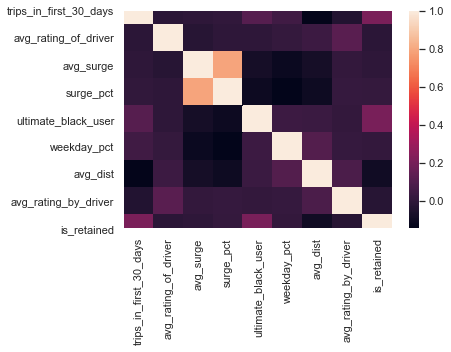

In [159]:
sns.heatmap(ultimate_df.corr())

In [160]:
ultimate_df.corr()['is_retained'].sort_values(ascending=False)

is_retained               1.000000
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.011653
avg_rating_by_driver     -0.026791
avg_dist                 -0.092780
Name: is_retained, dtype: float64

We can see that only 2 variables are correlated with some significance 

In [161]:
ultimate_df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
is_retained                        int64
dtype: object

City and phone are 2 variables that are non-numeric so we will have to work with them separately by converting them firstly to one hot encoded form

In [163]:
## analysing null values in these columns
ultimate_df['city'].isnull().value_counts()

False    50000
Name: city, dtype: int64

In [164]:
ultimate_df['phone'].isnull().value_counts() ## converting the null values to other

False    49604
True       396
Name: phone, dtype: int64

In [166]:
ultimate_df['phone'].fillna('Other', inplace=True)

In [169]:
ultimate_df['phone'].isnull().value_counts()

False    50000
Name: phone, dtype: int64

In [170]:
from collections import Counter
Counter(ultimate_df['phone']).most_common()

[('iPhone', 34582), ('Android', 15022), ('Other', 396)]

In [172]:
phone_ohe = pd.get_dummies(ultimate_df['phone'])
cities_ohe = pd.get_dummies(ultimate_df['city'])

In [176]:
ultimate_df = ultimate_df.join(phone_ohe).join(cities_ohe).drop(['city','phone'], axis=1)

In [177]:
ultimate_df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,is_retained,Android,Other,iPhone,Astapor,King's Landing,Winterfell
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,0,0,1,0,1,0
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,0,0,1,1,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,0,0,1,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,1,0,0,0,0,1


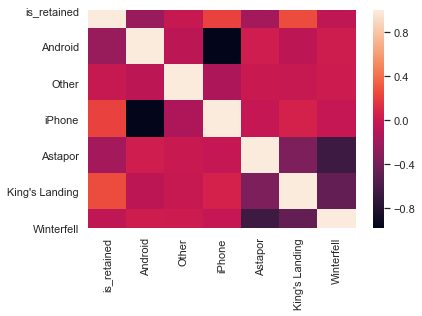

In [182]:
sns.heatmap(ultimate_df.iloc[:, -7:].corr())

In [181]:
ultimate_df.iloc[:, -7:].corr()['is_retained'].sort_values(ascending=False)

is_retained       1.000000
King's Landing    0.262284
iPhone            0.225244
Other            -0.007419
Winterfell       -0.046611
Astapor          -0.174655
Android          -0.225464
Name: is_retained, dtype: float64

2 variables are closely related with is_retained

We also have 2 datetime columns

In [186]:
ultimate_df['signup_days'] = ultimate_df['signup_date'].dt.strftime('%Y%m%d').astype(int) - 20140101

In [187]:
ultimate_df[['is_retained','signup_days']].corr()

,is_retained,signup_days
is_retained,1.000000,-0.020211
signup_days,-0.020211,1.000000


not much correlated

In [195]:
ultimate_df['last_trip_days'] = (ultimate_df['last_trip_date']-min(ultimate_df['last_trip_date'])).dt.days + 1 # as number of days so we add 1

In [197]:
ultimate_df[['last_trip_days','is_retained']].corr()

,last_trip_days,is_retained
last_trip_days,1.000000,0.780837
is_retained,0.780837,1.000000


Highly correlated as anticipated

In [198]:
ultimate_df.columns

Index(['trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'surge_pct', 'ultimate_black_user',
       'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'is_retained',
       'Android', 'Other', 'iPhone', 'Astapor', 'King's Landing', 'Winterfell',
       'signup_days', 'last_trip_days'],
      dtype='object')

In [199]:
ultimate_df.drop(['last_trip_date', 'signup_date'], axis=1, inplace=True)

In [202]:
ultimate_df.dtypes

trips_in_first_30_days      int64
avg_rating_of_driver      float64
avg_surge                 float64
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
is_retained                 int64
Android                     uint8
Other                       uint8
iPhone                      uint8
Astapor                     uint8
King's Landing              uint8
Winterfell                  uint8
signup_days                 int64
last_trip_days              int64
dtype: object

In [203]:
ultimate_df['ultimate_black_user'] = ultimate_df['ultimate_black_user']*1

In [205]:
ultimate_df.dtypes # all are numeric now 

trips_in_first_30_days      int64
avg_rating_of_driver      float64
avg_surge                 float64
surge_pct                 float64
ultimate_black_user         int64
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
is_retained                 int64
Android                     uint8
Other                       uint8
iPhone                      uint8
Astapor                     uint8
King's Landing              uint8
Winterfell                  uint8
signup_days                 int64
last_trip_days              int64
dtype: object

### Prediction

In [226]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve
import time
import numpy as np

In [222]:
with open('/Users/shaleenanandtaneja/Desktop/ultimate_challenge/ultimate_data_challenge.json') as json_file:
    df = json.load(json_file)

In [224]:
df = pd.DataFrame(df)
df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)
df['signup_date'] = df['signup_date'].dt.strftime('%Y%m%d').astype(int) - 20140100
df['last_trip_date'] = (df['last_trip_date'] - min(df['last_trip_date'])).dt.days + 1

In [227]:
#### Step 1) Preprocess Data

np.random.seed(0)

df.phone.fillna('Other', inplace=True)
categorical_features = ['city', 'phone']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder())
]
)

numeric_features = [column for column in df.columns.tolist() if column not in categorical_features and
                    column not in ['last_trip_date', 'was_retained']]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
]
)


In [234]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,was_retained
0,King's Landing,4,25,4.7,1.10,168,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,29,5.0,1.00,125,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,6,4.3,1.00,7,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,10,4.6,1.14,180,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,27,4.4,1.19,74,Android,11.8,False,82.4,3.13,4.9,0


In [228]:
X = df.drop(['was_retained', 'last_trip_date'], axis=1)
y = df['was_retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


In [229]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

classifier_rf = RandomForestClassifier(random_state=0)

In [235]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_rf)])

In [240]:
param_grid_rf = {
                 'preprocessor__num__imputer__strategy': ['mean', 'median'], 
                 'classifier__n_estimators': [50, 100],
                 'classifier__criterion': ["gini", "entropy"],
                 'classifier__max_depth': [3, 10, 20, None],
                 'classifier__min_samples_leaf': randint(1, 9),
                 'classifier__min_samples_split': randint(2, 9),
                 'classifier__max_features': randint(1, 9)
}

In [241]:
cv = RandomizedSearchCV(pipeline, param_grid_rf, cv=5, iid=False, random_state=None)

In [242]:
classifier_rf.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [243]:
cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('num',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('imputer',
                                                                                                SimpleImputer(add_indicator=False,
                                                                     

In [245]:
y_pred = cv.predict(X_test)

print("Accuracy on the testing set is: %.3f" % cv.score(X_test, y_test))

Accuracy on the testing set is: 0.778


In [246]:
confusion_matrix(y_test, y_pred)

array([[8032, 1327],
       [1999, 3642]])

We have the model with roughly 77 percent accuracy that the customer would be retained 